In [1]:
import numpy as np
import matplotlib.pyplot as plt

# El Algoritmo _SOM_

## Pasos del algoritmo

Pasos elementales del algoritmo básico (_online_) de generación de un mapa auto-organizativo a partir de un conjunto de datos:

1. Seleccionar tamaño y tipo (hexagonal, cuadrado) del mapa
    * Típicamente se prefieren _grids_ hexagonales
2. Inicializar todos los vectores de pesos
    * Posiblemente de manera aleatoria, aunque existen variantes
3. Elegir un dato del conjunto de entrenamiento y _enfrentarlo_ al SOM
4. (_Competición_) Encontrar la mejor neurona (_Best Matching Unit_, BMU) del mapa, e.g. la más similiar
    * Usualmente la más cercana de acuerdo con la métrica euclídea
5. (_Cooperación_) Determinar las neuronas dentro del entorno de la BMU
    * Usualmente el tamaño del entorno decrece con la iteración
6. (_Adaptación_) Ajustar los pesos de las neuronas en el entorno de la BMU hacia el dato mostrado. 
    * En general, la tasa de aprendizaje decrece con cada iteración 
    * La magnitud del ajuste es proporcional a la proximidad de la neurona a la BMU
7. Repetir pasos 2-6 para $N$ iteraciones hasta convergencia


## Datos numéricos

* Consideramos en caso _discreto_ donde el espacio de entrada $\mathcal{X}$ son $N$ puntos de $\mathbb{R}^d$
* Un conjunto finito de vectores con $d$ componentes / __atributos__

## _Grid_ y entorno local

* Las neuronas del mapa forman un _mallado_ de $L$ elementos, en una o dos dimensiones 
    * También se puede realizar en dimensiones mayores
    * El mallado define la relación de vecindad de las neuronas

### Unidimensionales

* Espacios __unidimensionales__
    * Las neuronas quedan dispuestas sobre una línea
    * Una neurona está conectada / es más cercana a las neuronas que tiene a los lados

:::{figure-md} markdown-fig.6.03.1
<img src="./images/som_mapa_lineal.png" alt="fishy" class="bg-primary mb-1" width="600px">

SOM unidimensional
:::


### Bidimensionales

* Las neuronas se colocan sobre un mallado bidimensional
    * Son los más habituales en las aplicaciones
    * Hay mallados rectangulares y hexagonales
    * Una neurona tiene más _vecinos_ en un mallado hexagonal que en uno rectangular

:::{figure-md} markdown-fig.6.03.2
<img src="./images/som_mapas_bidimensionales.png" alt="fishy" class="bg-primary mb-1" width="600px">

Ejemplos de SOM bidimensionales
:::




## Vector asociado a las neuronas

A cada neurona se le asocia un vector (_prototipo_)

$$
\mathbf{W}_j\in\mathbb{R}^d,\quad j=1,\ldots,L
$$

Es decir:

$$
\mathbf{W}_j=(W_{1}^j,\ldots,W_{d}^j),\quad j=1,\ldots,L
$$

donde
* $d$: dimensión de las instancias (número de atributos)
* $L$: número de neuronas (unidades) de la red

Los valores iniciales de estos vectores se suelen asignar aleatoriamente (aunque existen otras técnicas). Estos vectores cambian con el _tiempo_ (iteración) de aprendizaje, hasta formar el SOM.

El conjunto de todos los prototipos en un tiempo de aprendizaje / iteración $t$:

$$
\mathcal{W}_t=\{\mathbf{W}_1(t),\ldots,\mathbf{W}_L(t)\}
$$


## Función de _vecindad_: __núcleo de entorno__

Dado $\mathcal{L}=\{1,\ldots,L\}$ el conjunto de las neuronas, y $t$ el tiempo (iteración de aprendizaje), se define una función

$$
h_t:\mathcal{L}\times\mathcal{L}\to \mathbb{R}^+
$$

que satisface las siguientes propiedades:

* $h$ es simétrica 
* $h_t(k,k)=1$ para todo $k\in\mathcal{L}$
* $h_t(k,l)$ depende únicamente de la distancia $d(k,l)$ entre las neuronas $k$ y $l$ en el _mallado_ 

denotamos distancia $d(k,l)=\|r_k-r_l\|$, y entonces

$$
h_t(k,l)=h(\|r_k-r_l\|)
$$


* es monótona decreciente

$$
h_t(k,l)\to0\quad\text{si}\quad \|r_k-r_l\|\to \infty
$$


### Recordatorio: Distancia euclídea

La distancia euclídea entre dos puntos de $\mathbb{R}^n$ es

$$
d(\mathbf{x},\mathbf{y})
=\|\mathbf{x}-\mathbf{y}\|_2
=\sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}
$$

### Opciones de función de vecindad

* Función _meseta_: es igual a 1 si la distancia entre $k$ y $l$ es menor que cierto radio (que puede ser función del tiempo), y 0 en otro caso

$$
h_t(k,l)=\begin{cases}1&\text{ si }&d(k,l)<\rho(t)\\
0&\text{ otro caso}&
\end{cases}
$$

donde $\rho(t)$ es una función decreciente con el tiempo.

* Función gaussiana:

$$
h_t(c,k)=\alpha(t)e^{-\frac{\|r_c-r_k\|^2}{2\sigma^2(t)}}
$$

donde $\alpha$ y $\sigma$ son funciones decrecientes del tiempo.

Un ejemplo puede ser

$$
\alpha(t)=\frac{A}{B+t},\qquad \sigma(t)=Ce^{-Dt},\qquad A,B,C,D\in\mathbb{R}^+
$$

* Función __recortada__: si definimos un conjunto de puntos, $N_c\subset\mathcal{L}$, que conforman el entorno de una neurona cualquiera $c\in\mathcal{L}$ entonces:

$$
h_t(c,k)=\begin{cases}
\alpha(t)&\text{si}&k\in N_c\\
0&\text{si}&k\notin N_c
\end{cases}
$$

donde $\alpha(t)$ es una función monótona decreciente para todo $t$ y $0<\alpha(t)<1$.

### Radio de influencia

El __radio__, $\sigma$ determina el tamaño de la región de influencia del dato de entrenamiento $x$. Una estrategia común es comenzar el aprendizaje con un radio grande e ir reduciéndolo a medida que avanzan las iteraciones.

$$
\sigma(t)=\sigma(0)\exp\left(-t*\beta\right)
$$

donde $\beta<0$ es la tasa de decaimiento.

__Observación:__ usando un $\sigma^2\leq 10$, el valor del _kernel_ es casi cero para neuronas a distancia mayor o igual a 10.


### Observaciones

Si la distancia de la neurona $(i,j)$ al BMU es grande, $h_t$ tenderá a cero, realizándose en ese caso un cambio casi imperceptible en el vector prototipo de la neurona.

Los datos de aprendizaje afectan, por tanto, al BMU (en la mayor cantidad) y a las neuronas vecinas en cantidad decreciente con la distancia de éstas al BMU.


:::{figure-md} markdown-fig.6.03.3
<img src="./images/som_vecindades.png" alt="fishy" class="bg-primary mb-1" width="600px">

Funciones vecindad e impacto en el mallado del SOM
:::

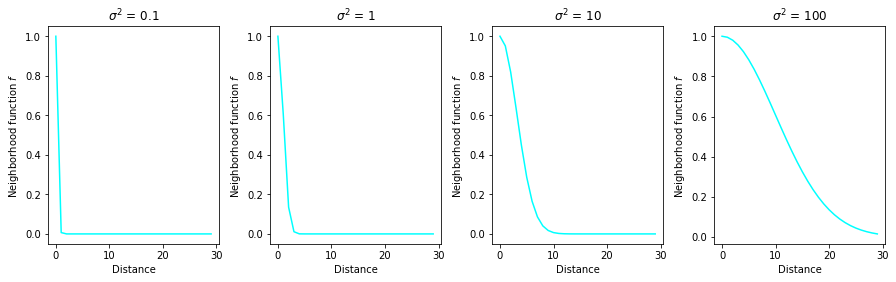

In [4]:
distance = np.arange(0, 30)
sigma_sq = [0.1, 1, 10, 100]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for s, ind in zip(sigma_sq, plt_ind):
    plt.subplot(ind)
    f = np.exp(-distance ** 2 / 2 / s)
    plt.plot(distance, f, c='cyan')
    plt.title('$\sigma^2$ = ' + str(s))
    plt.xlabel('Distance')
    plt.ylabel('Neighborhood function $f$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

## _Competición_

### Elección de la _Best Matching Unit_

Supongamos:

* paso $t$ del aprendizaje

* el vector de entrada es $\mathbf{x}_i=(x_{i1},x_{i2},\ldots,x_{im})$ 

:::{note}
$i$ no tiene que ser igual a $t$ __¿por qué?__
:::


* asociada a cada neurona $j\in\mathcal{L}$ en el paso $t$ está asociado el vector 

$$
\mathbf{W}_j(t)=(W_{1}^j(t),W_{2}^j(t),\ldots,W_{d}^j(t)),\quad W_s^j(t)\in\mathbb{R},\quad s\in\{1,\ldots,d\}
$$

> __Nota:__ si el mapa es bidimensional entonces $\mathcal{L}=\mathcal{L}_1\times \mathcal{L}_2$ es el número total de neuronas dispuestas en el mapa bidimensional.

#### __Best Matching Unit:__

La neurona que mejor refleja la información recogida en el vector de entrada $\mathbf{x}_i$ es la __Best Matching Unit__ (__BMU__) y es la neurona que cumple que la distancia de su prototipo en el tiempo $t$ al dato de entrada es mínima:

$$
BMU_t(\mathbf{x_i})=
\underset{k\in\mathcal{L}}{\mathrm{argmin}}=
\|\mathbf{x}_i-\mathbf{W}_k(t)\|
$$

En la práctica se suele elegir la distancia euclídea:

$$
\|\mathbf{x}_i-\mathbf{W}_j(t)\|
=
\sqrt{
\sum_{s=1}^d (x_{is}-W_{js})^2
}
$$





## _Cooperación y Adaptación_

### Actualización de los vectores de referencia

:::{figure-md} markdown-fig.6.03.4
<img src="./images/som_actualizacion.png" alt="fishy" class="bg-primary mb-1" width="600px">

Actualización de los vectores
:::

Durante el proceso de entrenamiento, las neuronas __cercanas__ a la que verifica la condición de máxima proximidad, $BMU$, se actualizan:

$$
\mathbf{W}_k(t+1)=\mathbf{W}_k(t)+ \eta(t)h_t(BMU,k)(\mathbf{x}_i-\mathbf{W}_k(t)),\quad k\in N_{BMU} \text{ ó }k\in\mathcal{L}
$$

donde 

* $BMU$ es $BMU_t(i)$
* $\eta(t)$ es la _tasa de aprendizaje_ (positiva, $<1$, monótona decreciente)
* $h_t(BMU,k)$ es el núcleo de entorno (centrado en $BMU_t(i)$)
* $(\mathbf{x}_i-\mathbf{W}_k(t))$ es un vector cuyo origen está en $\mathbf{W}_k(t)$ y extremo en $\mathbf{x}$


:::{note}
Esto quiere decir que hay un $\delta\in[0,1]$ tal que:

$$
\mathbf{W}_k(t+1)=(1-\delta)\mathbf{W}_k(t)+\delta\mathbf{x_i}
$$

:::

> __Pregunta:__ ¿Qué efecto _geométrico_ está realizando esta operación? ¿Tiene algún efecto sobre la posición de las neuronas en el mapa?

:::{important}
Si hemos definido un entorno $N_c$ para cada neurona $\mathbf{c}\in\mathcal{L}$ la actualización se realiza únicamente para las funciones de dicho entorno.
:::


### La tasa de aprendizaje

La tasa de aprendizaje _escala_ la cantidad que se acerca el vector _prototipo_ de la neurona al dato multidimensional que estamos considerando en la iteración.

* Si $\eta=0$ entonces no hay ningún cambio
* Si $\eta=1$ entonces el vector prototipo $W_{k}(t+1)$ tomará el valor del dato $x$

Usualmente se considera una función $\eta$ decreciente con el _tiempo_ de aprendizaje (iteraciones, épocas del algoritmo). Una posible representación funcional de este comportamiento es:

$$
\eta(t)=\eta(0)e^{-t*\lambda}
$$
donde $\lambda<0$ es la tasa de decaimiento.

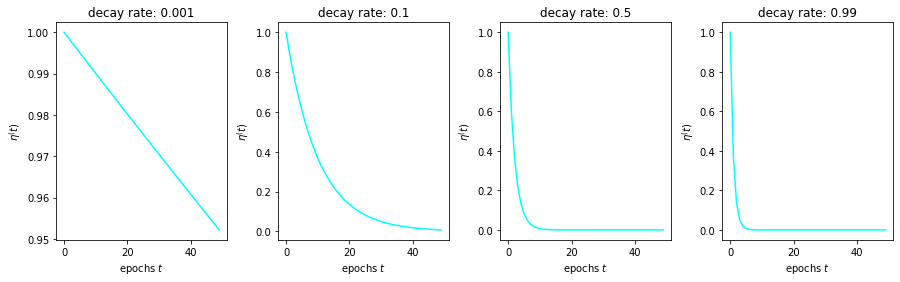

In [5]:
epochs = np.arange(0, 50)
lr_decay = [0.001, 0.1, 0.5, 0.99]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for decay, ind in zip(lr_decay, plt_ind):
    plt.subplot(ind)
    learn_rate = np.exp(-epochs * decay)
    plt.plot(epochs, learn_rate, c='cyan')
    plt.title('decay rate: ' + str(decay))
    plt.xlabel('epochs $t$')
    plt.ylabel('$\eta^(t)$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

## Resultado

* Obtenemos una partición del espacio de los datos llamada [teselación de Voronoi](https://en.wikipedia.org/wiki/Voronoi_diagram)


:::{figure-md} markdown-fig.6.03.5
<img src="./images/som_voronoi.png" alt="fishy" class="bg-primary mb-1" width="600px">

_Clusters_ en un SOM
:::

* Al terminar el aprendizaje se obtiene un __SOM__ donde el efecto de la transformación puede hacer aparecer _clusters_ asociados a las neuronas
    * Un _cluster_ $C_k$ se define como el conjunto de los _inputs_ (datos de entrada) que son más _cercanos_ a $\mathbf{W}_k(\infty)$ que a cualquier otro $\mathbf{W}_j(\infty)$, $j\neq k$.
    * Existe una _estructura de vecindad_ (una topología) entre los _clusters_

### Visualizaciones

* El mapa de Kohonen consiste en, o bien la representación de los _prototipos_ (vectores asociados a las neuronas), o de los contenidos de cada _cluster_ de acuerdo a la estructura de vecindad (posición en el _lattice_) de las neuronas.

### Propiedades

* Los prototipos del SOM representan el espacio de los datos de entrada fielmente, como hacen otros algoritmos de _clustering_
* __Auto-organización:__ los prototipos preservan la _topología_ de los datos: _inputs_ cercanos estarán o bien en el mismo _cluster_ (como hacen otros algoritmos de _clustering_) o en _clusters_ cercanos



## Convergencia

El algoritmo es fácil de programar y usar, y muchos estudios prácticos confirman que _funciona_.

No obstante, el problema de la convergencia en algoritmos __no supervisados__ no es inmediata. 

Cuando $t\to\infty$ el proceso estocástico

$$
(\mathbf{W}_k(t))_{k\in\mathcal{L}}
$$

en $\mathbb{R}^d$ puede presentar
* oscilaciones
* _explotar_ al infinito
* convergencia (en distribución) a un proceso de equilibrio
* convergencia (en distribución o casi seguro) a un conjunto finito de puntos en $\mathbb{R}^d$

De hecho, en el caso de SOM bidimensionales no existe una prueba completa y el problema permanece abierto.

+ {cite}`Fort2006`

En el caso de SOM unidimensionales hay resultados más completos

+ {cite}`Cottrell2018`

### Preguntas abiertas

* ¿Es el algoritmo convergente en distribución o casi seguro cuando $t\to\infty$?
* ¿Cuál es el efecto de $\eta(t)$?
* Si existe un estado límite, ¿es estable?
* ¿Cómo caracterizamos la _organización_?




## Cuantificación del _error_

Una manera de medir la convergencia hacia una organización óptima es mediante una función error.

En el caso discreto, se puede probar que

$$
E(\mathcal{W})=\frac{1}{2N}\sum_{i=1}^N\sum_{k=1}^{L}h(BMU,k)\|W_k-x_i\|^2
$$

donde
* $BMU=BMU(x_i)$ (elegida según el algoritmo descrito más arriba)
* $N$ es el número total de datos de entrada

es una función de energía o, también denominada, ``distorsión``.

Esta función combina dos criterios:
* un criterio de _clustering_
* un criterio de organización correcta

No obstante, la existencia de esta función energía no asegura la convergencia
   * el gradiente de la función no es continua en los bordes de los _clusters_

Para minimizar este error se realizan varios entrenamientos con diferentes condiciones iniciales
   * se elige el mapa con el menor error



## Otras versiones del SOM

* SOM Determinista _Batch_

Existe una versión determinista del SOM, para obtener resultados reproducibles cuando los los valores iniciales de los prototipos son fijos.

En esta versión se usan _todos_ los datos en cada iteración.

* SOM para datos no numéricos

Existen versiones del SOM para datos no numéricos


## Pseudocódigo

### _Stochastic learning_

+ __foreach__ $\mathbf{w}_i\in\mathbf{W}$:
    + Initialize $w_i$

+ __while__ _stopping condition(s) not true:
    + Select random input vector $\mathbf{x}_i\in\mathbf{X}$
    + Find the best mathching neuron (BMU) for $\mathbf{x}_i$
    + __foreach__ $\mathbf{w}_i\in\mathbf{W}$:
        + Update $\mathbf{w}_i$
    + __end for__
+ __end__


### _Batch learning_

+ __foreach__ $\mathbf{w}_i\in\mathbf{W}$:
    + Initialize $w_i$

+ __while__ _stopping condition(s) not true:
    + __foreach__ $\mathbf{w}_i\in\mathbf{W}$:
        + $X_i\leftarrow\emptyset$
        + __foreach__ $\mathbf{x}_i\in\mathbf{X}$:
            + __if__ $\mathbf{x}_i$ is in neighbourhood of $\mathbf{w}_i$:
                + Add $\mathbf{x}_i$ to $X_i$
            + __end if__
        + __end for__
    + __end for__
    + __foreach__ $\mathbf{w}_i\in\mathbf{W}$:
        + $\mathbf{w}_i\leftarrow$ update mean over $X_i$
    + __end for__
+ __end__


## Bioinspirado

* {cite}`Kohonen1982a`
* {cite}`Kohonen1982b`
* {cite}`Kohonen2000` 

* Existe una ingente cantidad de experimentos y observaciones que demuestran la existencia de un orden espacial en  la organización de las funciones cerebrales.
    * Ubicuo en los sistemas nerviosos
    * Implantado en los modelos de redes neuronales?


* Compartimentalización del cerebro en partes _macroscópicas_ (no necesariamente anatómicas) con _funciones_ concretas
    * _nuclei_ que controlan la emoción, _arousal_, intención
    * existe una organización espacial en el tejido cerebral en el que observa una correlación entre funciones neuronales y coordenadas del área cerebral
    * hay _areas asociativas_ en las cuales las señales de diferente modalidad convergen

* La posibilidad de que la representación del conocimiento de una particular categoría de cosas pueda asumir la forma de un mapa de características que está geométricamente organizado sobre un trozo correspondiente de cerebro motivó a Kohonen para crear los SOM.

* Kohonen pretende crear un mecanismo de aprendizaje que crease mapas globalmente ordenados de diferentes _inputs_ sensoriales en una red neuronal con capas.

* En la fase de aprendizaje 
    * _inputs_ recibidos por la experiencia práctica, sin supervisión
    * los _inputs_ controlan las conexiones neuronales: se _refuerzan_ o _desaparecen_

* Modeliza la plasticidad de las conexiones sinápticas en el cerebro.

* La selección de vector del _codebook_ más próximo, llamado _ganador_ o __BMU__ no está basada en una comparación métrica directa, si no en un mecanismo de interacción colectiva, que se observa en _networks_ interconectadas similares a las del cerébro.

* El proceso se denomina [competitive learning](https://en.wikipedia.org/wiki/Competitive_learning)
    * en neurociencia se suele hablar de _competición_ entre los elementos cuando son estimulados por el mismo input, y el elemento, cuyos parámetros se ajustan más al _input_ es el más activado
    * si el elemento más activado suprime la actividad de las neuronas adyacentes, se le conoce como _winner_
    * si el proceso se repite aparece una estructura en la organización de las neuronas: emergen mapas que están relacionados topológicamente a los inputs sensoriales (signal space)
 
* En las redes en las que se da el _competitive learning_, las _células_ reciben el mismo _input_ de información, sobre el cual compiten. 
    * un mensaje entrante $X$ se compara con todos los posibles modelos $M_i$

* Mediante interacciones laterales (positivas y negativas), una de las _células_ se convierte en la __ganadora__ (y suprime la actividad de todas las demás _células_ con un feedback negativo).

 * emergencia de _feature-specific-cells__: neuronas (o sistemas de neuronas) que responden de manera selectiva a _input patterns_

* las _celdas_ o _unidades_ no se mueven a ninguna parte: el conjunto de sus parámetros internos es el que cambia y define la especificidad de cada _celda_

* Como las _networks_ son usualmente planas, entonces obtenemos funciones que mapean el espacio de los inputs, preservando las relaciones topológicas y reduciendo la dimensión.